In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/econometrics/
!ls

Mounted at /content/drive
/content/drive/MyDrive/econometrics


In [2]:
!pip install yahoo_fin
from yahoo_fin import stock_info as si
import time
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.8 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=d541e078e8afcf4df19b55638881c78ccb713a699f8629cda12a071af132a680
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.3
    Uninstalling urllib3-2.2.3:
      Successfully uninstalled urllib3-2.2.3


In [3]:
# Step 1: Define tickers and download stock data using yahoo_fin
tickers = ['AAPL', 'AMZN', 'META', 'GE', 'GOOGL', 'GS', 'IBM', 'JPM', 'MSFT', 'TSLA']
stocks = {}

# Download data for each stock and store in the dictionary
for ticker in tickers:
    try:
        print(f"Downloading data for {ticker}...")
        # Fetch historical data for the stock using yahoo_fin
        data = si.get_data(ticker, start_date="2010-12-31", end_date="2024-10-01")
        data['Stock_Returns'] = data['adjclose'].pct_change()  # Calculate daily returns
        stocks[ticker] = data[['adjclose', 'Stock_Returns']].rename(columns={'adjclose': 'Adj Close'})
        time.sleep(1)  # Add a short delay to avoid rate limits
    except Exception as e:
        print(f"Failed to download data for {ticker}. Error: {e}")

# Combine all stock data into a single DataFrame if downloads succeeded
if stocks:
    combined_df = pd.concat(stocks.values(), keys=stocks.keys())
    combined_df.reset_index(level=0, inplace=True)
    combined_df.rename(columns={'level_0': 'Stock'}, inplace=True)
    print("Stock data downloaded and combined successfully.")
else:
    print("No stock data was downloaded. Please check your tickers or internet connection.")

# Display the first few rows of combined stock data
print("Combined Stock Data Sample:")
print(combined_df.head())

# Step 2: Download S&P 500 data
try:
    print("Downloading S&P 500 data...")
    sp500 = si.get_data("^GSPC", start_date="2010-12-31", end_date="2024-10-01")
    sp500['SP500_Returns'] = sp500['adjclose'].pct_change()
    print("S&P 500 data downloaded successfully.")
except Exception as e:
    print(f"Failed to download S&P 500 data. Error: {e}")

# Step 3: Merge stock returns with S&P 500 returns on 'Date'
if 'sp500' in locals():
    combined_df.reset_index(inplace=True)
    sp500.reset_index(inplace=True)
    merged_data = pd.merge(combined_df, sp500[['index', 'SP500_Returns']], left_on='index', right_on='index', how='inner')

    merged_data.rename(columns={'index': 'Date'}, inplace=True)

    # Drop rows with NaN values resulting from percentage change calculations
    merged_data.dropna(subset=['Stock_Returns', 'SP500_Returns'], inplace=True)

    # Display the first few rows of the merged data
    print("Merged Data Sample:")
    print(merged_data.head())
else:
    print("S&P 500 data not available. Cannot proceed with merging.")


Stock data downloaded and combined successfully.
Combined Stock Data Sample:
           Stock  Adj Close  Stock_Returns
2010-12-31  AAPL   9.728354            NaN
2011-01-03  AAPL   9.939775       0.021732
2011-01-04  AAPL   9.991650       0.005219
2011-01-05  AAPL  10.073380       0.008180
2011-01-06  AAPL  10.065243      -0.000808
S&P 500 data downloaded successfully.
Merged Data Sample:
        Date Stock  Adj Close  Stock_Returns  SP500_Returns
1 2011-01-03  AAPL   9.939775       0.021732       0.011315
2 2011-01-04  AAPL   9.991650       0.005219      -0.001313
3 2011-01-05  AAPL  10.073380       0.008180       0.005007
4 2011-01-06  AAPL  10.065243      -0.000808      -0.002123
5 2011-01-07  AAPL  10.137320       0.007161      -0.001845


In [4]:
merged_data

,Date,Stock,Adj Close,Stock_Returns,SP500_Returns
1,2011-01-03,AAPL,9.939775,0.021732,0.011315
2,2011-01-04,AAPL,9.991650,0.005219,-0.001313
3,2011-01-05,AAPL,10.073380,0.008180,0.005007
4,2011-01-06,AAPL,10.065243,-0.000808,-0.002123
5,2011-01-07,AAPL,10.137320,0.007161,-0.001845
...,...,...,...,...,...
34237,2024-09-24,TSLA,254.270004,0.017080,0.002511
34238,2024-09-25,TSLA,257.019989,0.010815,-0.001861
34239,2024-09-26,TSLA,254.220001,-0.010894,0.004039
34240,2024-09-27,TSLA,260.459991,0.024546,-0.001253


In [60]:
import statsmodels.api as sm

In [63]:
def calculate_capm(stock_returns, market_returns):
    X = sm.add_constant(market_returns)  # Add constant (alpha)
    model = sm.OLS(stock_returns, X).fit()  # Fit linear regression
    return model.params['const'], model.params['SP500_Returns'], model.rsquared

capm_results = []

for stock in merged_data['Stock'].unique(): # Loop through unique stocks
    # Filter merged_data for the current stock
    stock_data = merged_data[merged_data['Stock'] == stock]

    # Get stock and market returns from the filtered data
    stock_returns = stock_data['Stock_Returns']
    market_returns = stock_data['SP500_Returns']

    alpha, beta, r_squared = calculate_capm(stock_returns, market_returns)

    # Append results as a dictionary to the list
    capm_results.append({
        'Stock': stock.replace('_Close', ''),
        'Alpha': alpha,
        'Beta': beta,
        'R_squared': r_squared
    })

# Create a DataFrame from the list of results
capm_results = pd.DataFrame(capm_results)

# Display the CAPM results
print("CAPM Results for Multiple Stocks:")
print(capm_results)


CAPM Results for Multiple Stocks:
   Stock     Alpha      Beta  R_squared
0   AAPL  0.000519  1.114523   0.468403
1   AMZN  0.000524  1.132112   0.354906
2   META  0.000523  1.244324   0.272882
3     GE -0.000045  1.099224   0.358031
4  GOOGL  0.000296  1.098812   0.483753
5     GS -0.000064  1.215449   0.546709
6    IBM -0.000034  0.821417   0.398505
7    JPM  0.000135  1.175571   0.544304
8   MSFT  0.000430  1.140283   0.577600
9   TSLA  0.001348  1.443690   0.196012


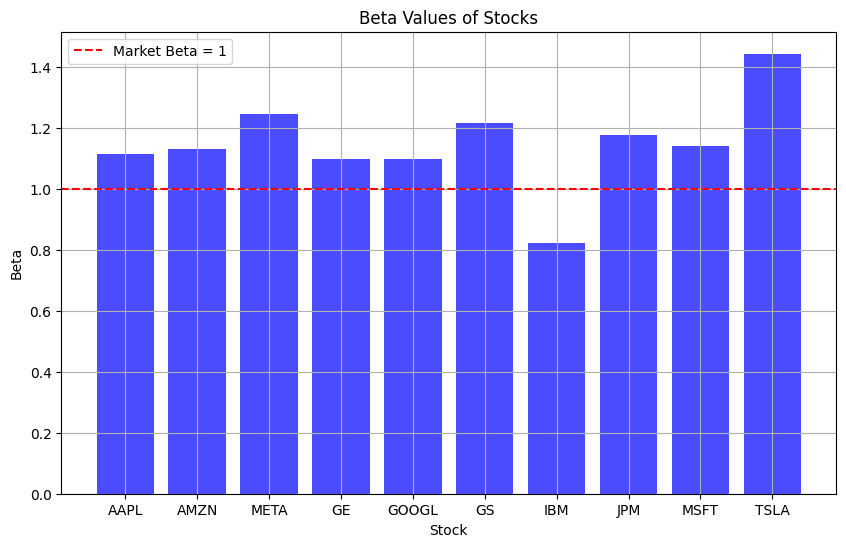

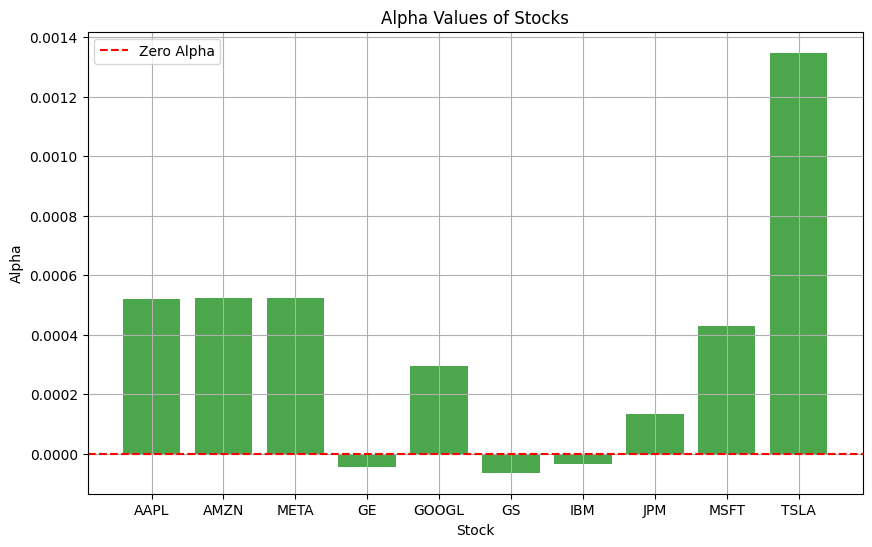

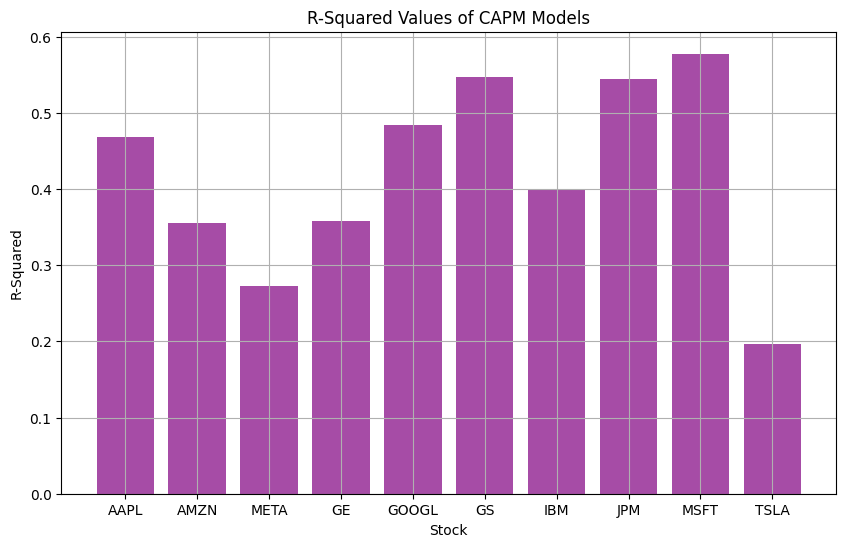

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(capm_results['Stock'], capm_results['Beta'], color='blue', alpha=0.7)
plt.title('Beta Values of Stocks')
plt.xlabel('Stock')
plt.ylabel('Beta')
plt.axhline(y=1, color='red', linestyle='--', label='Market Beta = 1')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(capm_results['Stock'], capm_results['Alpha'], color='green', alpha=0.7)
plt.title('Alpha Values of Stocks')
plt.xlabel('Stock')
plt.ylabel('Alpha')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Alpha')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(capm_results['Stock'], capm_results['R_squared'], color='purple', alpha=0.7)
plt.title('R-Squared Values of CAPM Models')
plt.xlabel('Stock')
plt.ylabel('R-Squared')
plt.grid(True)
plt.show()


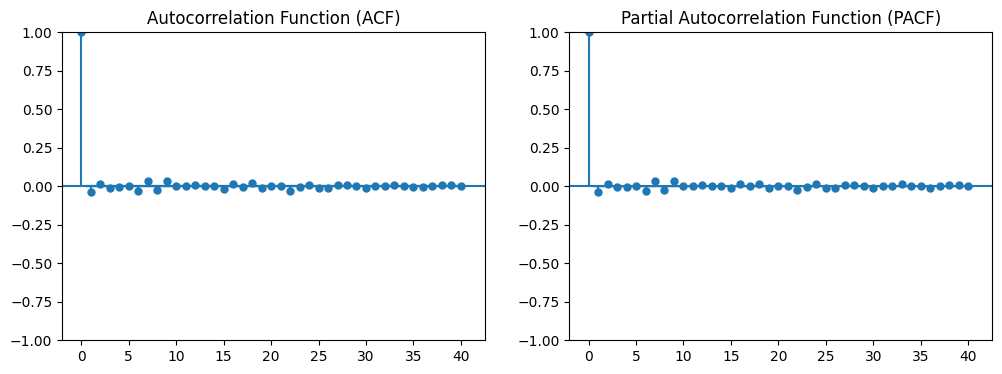

In [8]:
# Assuming 'merged_data' is your DataFrame
stock_returns = merged_data['Stock_Returns']

# Plot ACF
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sm.graphics.tsa.plot_acf(stock_returns, lags=40, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

# Plot PACF
sm.graphics.tsa.plot_pacf(stock_returns, lags=40, ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.show()


In [9]:
!pip install arch
import itertools
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model

# Define p, d, q ranges
p = range(0, 3)  # AR terms
d = range(0, 2)  # Differencing terms
q = range(0, 3)  # MA terms

# Generate all possible combinations of p, d, q
pdq_combinations = list(itertools.product(p, d, q))

# Loop through each combination and find the best AIC score
best_aic = float('inf')
best_pdq = None
best_model = None

for pdq in pdq_combinations:
    try:
        model = ARIMA(merged_data['Stock_Returns'], exog=merged_data['SP500_Returns'], order=pdq)
        model_fit = model.fit()
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_pdq = pdq
            best_model = model_fit
        print(f"ARIMA{pdq} - AIC: {model_fit.aic}")
    except Exception as e:
        print(f"ARIMA{pdq} - Exception: {e}")

print(f"Best ARIMA order: {best_pdq} with AIC: {best_aic}")
print(best_model.summary())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 982.9/982.9 kB 23.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0) - AIC: -182334.19960271876


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1) - AIC: -182332.28039188453


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA(0, 0, 2) - AIC: -182332.41429776905


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0) - AIC: -158656.46354844279


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1) - AIC: -182325.77491783944


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA(0, 1, 2) - AIC: -182323.81202022167


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0) - AIC: -182332.27922371597


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1) - AIC: -182331.46408895808


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2) - AIC: -182332.00095512345


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0) - AIC: -168285.08107512916


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

ARIMA(1, 1, 1) - AIC: -182323.8096647504


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

ARIMA(1, 1, 2) - AIC: -182324.1200811668


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA(2, 0, 0) - AIC: -182332.38716916685


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA(2, 0, 1) - AIC: -182332.10693588966


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2) - AIC: -182330.0290049716


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA(2, 1, 0) - AIC: -172482.75042232522


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

ARIMA(2, 1, 1) - AIC: -182305.91634922894


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

ARIMA(2, 1, 2) - AIC: -182310.68187895062
Best ARIMA order: (0, 0, 0) with AIC: -182334.19960271876
                               SARIMAX Results                                
Dep. Variable:          Stock_Returns   No. Observations:                34232
Model:                          ARIMA   Log Likelihood               91170.100
Date:                Thu, 24 Oct 2024   AIC                        -182334.200
Time:                        03:09:00   BIC                        -182308.877
Sample:                             0   HQIC                       -182326.125
                              - 34232                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0004   9.24e-05      3.865      0.000       0.000       0.001
SP500_Returns     1.14

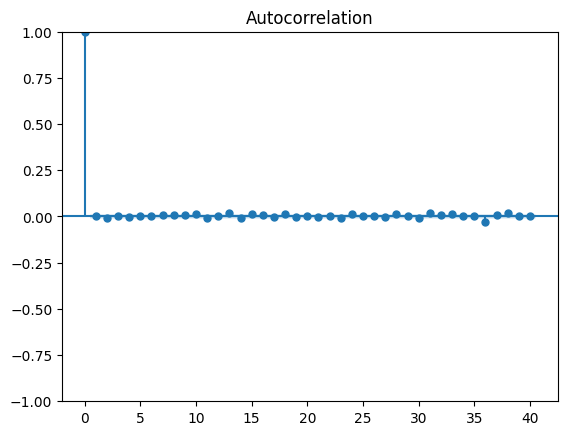

Ljung-Box Test Residual Results:
      lb_stat  lb_pvalue
10  13.619706   0.191055


In [10]:
# Plot residuals
residuals = best_model.resid
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

# Ljung-Box test for residuals
ljung_box_results = sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box Test Residual Results:")
print(ljung_box_results)


In [11]:
from arch import arch_model

# Define p and q ranges for GARCH
p = range(1, 3)
q = range(1, 3)

# Loop through each combination of p, q
best_garch_aic = float('inf')
best_garch_order = None
best_garch_model = None

for p_val in p:
    for q_val in q:
        try:
            garch_model = arch_model(residuals, vol='Garch', p=p_val, q=q_val)
            garch_fit = garch_model.fit(disp="off")
            if garch_fit.aic < best_garch_aic:
                best_garch_aic = garch_fit.aic
                best_garch_order = (p_val, q_val)
                best_garch_model = garch_fit
            print(f"GARCH({p_val}, {q_val}) - AIC: {garch_fit.aic}")
        except Exception as e:
            print(f"GARCH({p_val}, {q_val}) - Exception: {e}")

print(f"Best GARCH order: {best_garch_order} with AIC: {best_garch_aic}")
print(best_garch_model.summary())


GARCH(1, 1) - AIC: -192849.74900422833


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002846. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002846. Parameter
estimation work better when this value is between 1 and 1000. The recomme

GARCH(1, 2) - AIC: -193174.20542843966


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002846. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:3

GARCH(2, 1) - AIC: -192655.96632773418
GARCH(2, 2) - AIC: -193002.4170650977
Best GARCH order: (1, 2) with AIC: -193174.20542843966
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                96592.1
Distribution:                  Normal   AIC:                          -193174.
Method:            Maximum Likelihood   BIC:                          -193132.
                                        No. Observations:                34232
Date:                Thu, Oct 24 2024   Df Residuals:                    34231
Time:                        03:09:02   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [12]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Out-of-sample predictions
arimax_forecast = best_model.get_forecast(steps=100, exog=merged_data['SP500_Returns'].iloc[-100:])
arimax_forecast_mean = arimax_forecast.predicted_mean

# Calculate MSE or RMSE
actuals = merged_data['Stock_Returns'].iloc[-100:]
mse = mean_squared_error(actuals, arimax_forecast_mean)
rmse = np.sqrt(mse)
print(f"RMSE of ARIMA-GARCH model: {rmse}")


RMSE of ARIMA-GARCH model: 0.03077757601888815


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(



Forecasting for Monthly period...
RMSE of ARIMA-GARCH model over Monthly: 0.03124440120543335


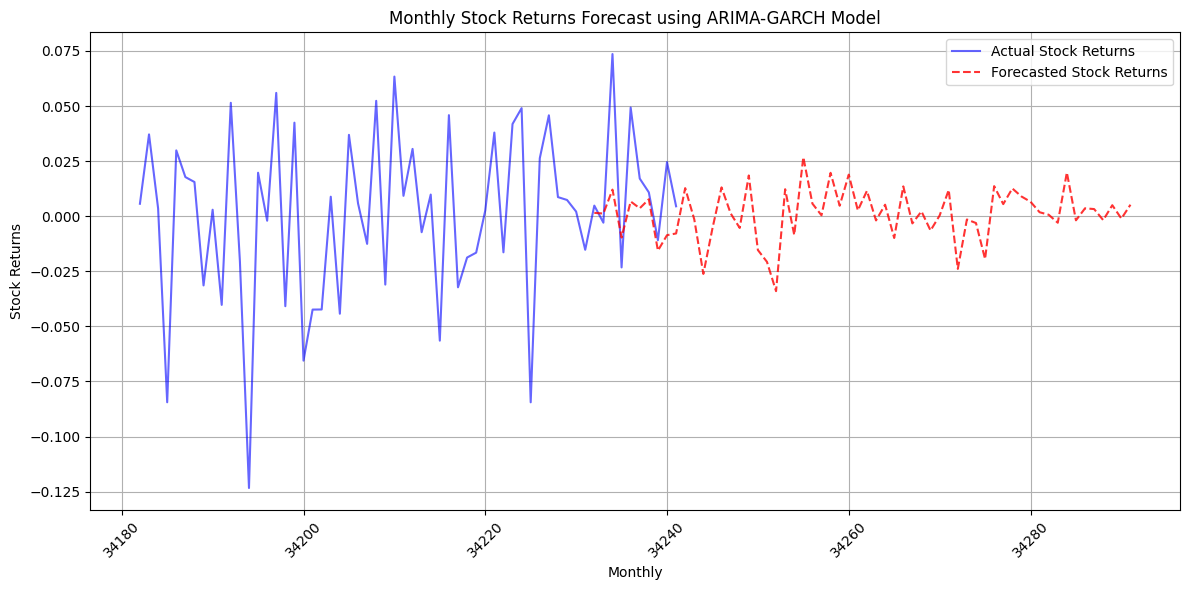


Forecasting for Weekly period...
RMSE of ARIMA-GARCH model over Weekly: 0.030460203013008533


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


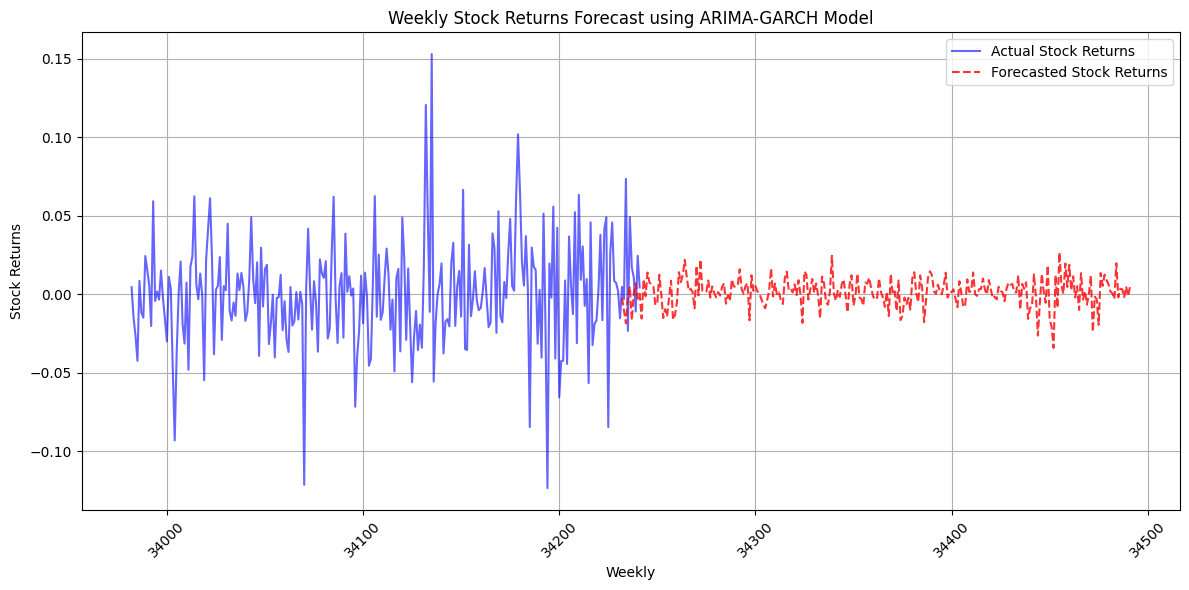


Forecasting for Daily period...
RMSE of ARIMA-GARCH model over Daily: 0.034398980113111065


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


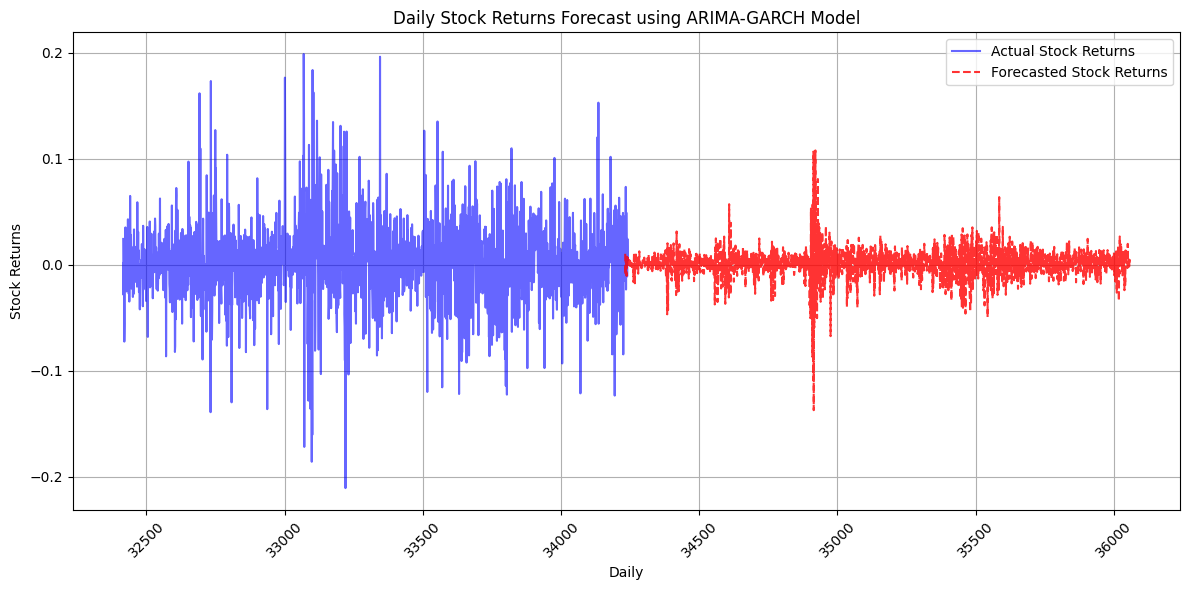

In [13]:
forecast_steps = {
    'Monthly': 60,  # 60 months (approx. 5 years)
    'Weekly': 260,  # 260 weeks (approx. 5 years)
    'Daily': 1826   # 1826 days (approx. 5 years including leap year)
    }

for period, steps in forecast_steps.items():
    print(f"\nForecasting for {period} period...")

    arimax_forecast = best_model.get_forecast(steps=steps, exog=merged_data['SP500_Returns'].iloc[-steps:])
    arimax_forecast_mean = arimax_forecast.predicted_mean

    actuals = merged_data['Stock_Returns'].iloc[-steps:]

    # Calculate MSE and RMSE for evaluation
    mse = mean_squared_error(actuals, arimax_forecast_mean)
    rmse = np.sqrt(mse)
    print(f"RMSE of ARIMA-GARCH model over {period}: {rmse}")

    plt.figure(figsize=(12, 6))
    plt.plot(actuals.index, actuals, label='Actual Stock Returns', color='blue', alpha=0.6)
    plt.plot(arimax_forecast_mean.index, arimax_forecast_mean, label='Forecasted Stock Returns', color='red', linestyle='--', alpha=0.8)
    plt.title(f'{period} Stock Returns Forecast using ARIMA-GARCH Model')
    plt.xlabel(period)
    plt.ylabel('Stock Returns')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [15]:
from statsmodels.tsa.stattools import coint

# Convert date columns to datetime format
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
sp500['Date'] = pd.to_datetime(sp500['index'])

# Merge stock data with S&P 500 data
merged_data = pd.merge(merged_data, sp500[['Date', 'SP500_Returns']], on='Date', how='inner')


# List to store results
cointegration_results = []

# Loop through each stock to perform cointegration test with S&P 500
tickers = merged_data['Stock'].unique()  # Get list of stock tickers
for ticker in tickers:
    stock_data = merged_data[merged_data['Stock'] == ticker]

    # Use 'Stock_Returns' for both stock and SP500 for consistency
    stock_prices = stock_data['Stock_Returns']
    sp500_prices_subset = stock_data['SP500_Returns']

    # Perform the cointegration test
    coint_result = coint(stock_prices, sp500_prices_subset)
    coint_statistic, p_value, critical_values = coint_result

    # Store the results
    result = {
        'Stock': ticker,
        'Cointegration Statistic': coint_statistic,
        'P-Value': p_value,
        'Critical Value 1%': critical_values[0],
        'Critical Value 5%': critical_values[1],
        'Critical Value 10%': critical_values[2],
        'Cointegrated': p_value < 0.05  # True if p-value is below 0.05
    }
    cointegration_results.append(result)

    # Print the result for each stock
    print(f"\n{ticker} Cointegration Test with S&P 500:")
    print(f"Cointegration Test Statistic: {coint_statistic}")
    print(f"P-Value: {p_value}")
    print(f"Critical Values (1%, 5%, 10%): {critical_values}")
    if result['Cointegrated']:
        print(f"{ticker} and S&P 500 are cointegrated at the 5% significance level.")
    else:
        print(f"{ticker} and S&P 500 are not cointegrated at the 5% significance level.")

# Convert results to a DataFrame for easier analysis
coint_results_df = pd.DataFrame(cointegration_results)
print("\nSummary of Cointegration Results:")
print(coint_results_df)



AAPL Cointegration Test with S&P 500:
Cointegration Test Statistic: -56.13311715444295
P-Value: 0.0
Critical Values (1%, 5%, 10%): [-3.89961084 -3.33789803 -3.04567707]
AAPL and S&P 500 are cointegrated at the 5% significance level.

AMZN Cointegration Test with S&P 500:
Cointegration Test Statistic: -42.900896219777366
P-Value: 0.0
Critical Values (1%, 5%, 10%): [-3.89961084 -3.33789803 -3.04567707]
AMZN and S&P 500 are cointegrated at the 5% significance level.

META Cointegration Test with S&P 500:
Cointegration Test Statistic: -28.37856055364663
P-Value: 0.0
Critical Values (1%, 5%, 10%): [-3.89996611 -3.338096   -3.04581445]
META and S&P 500 are cointegrated at the 5% significance level.

GE Cointegration Test with S&P 500:
Cointegration Test Statistic: -18.021924967769632
P-Value: 1.8379208765847202e-29
Critical Values (1%, 5%, 10%): [-3.89961084 -3.33789803 -3.04567707]
GE and S&P 500 are cointegrated at the 5% significance level.

GOOGL Cointegration Test with S&P 500:
Cointeg

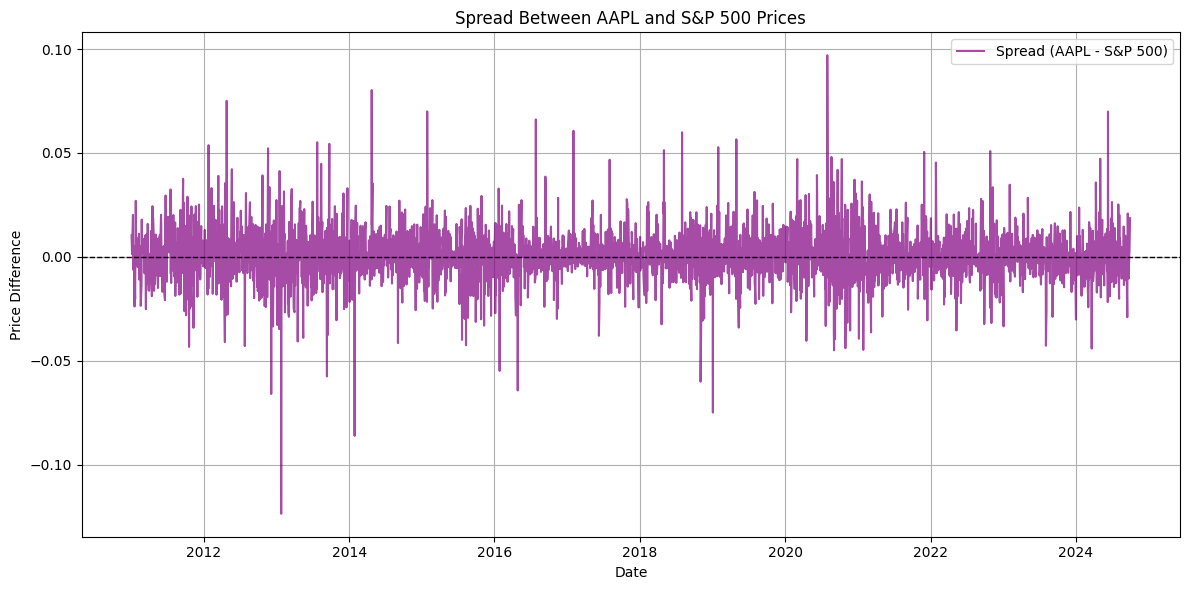

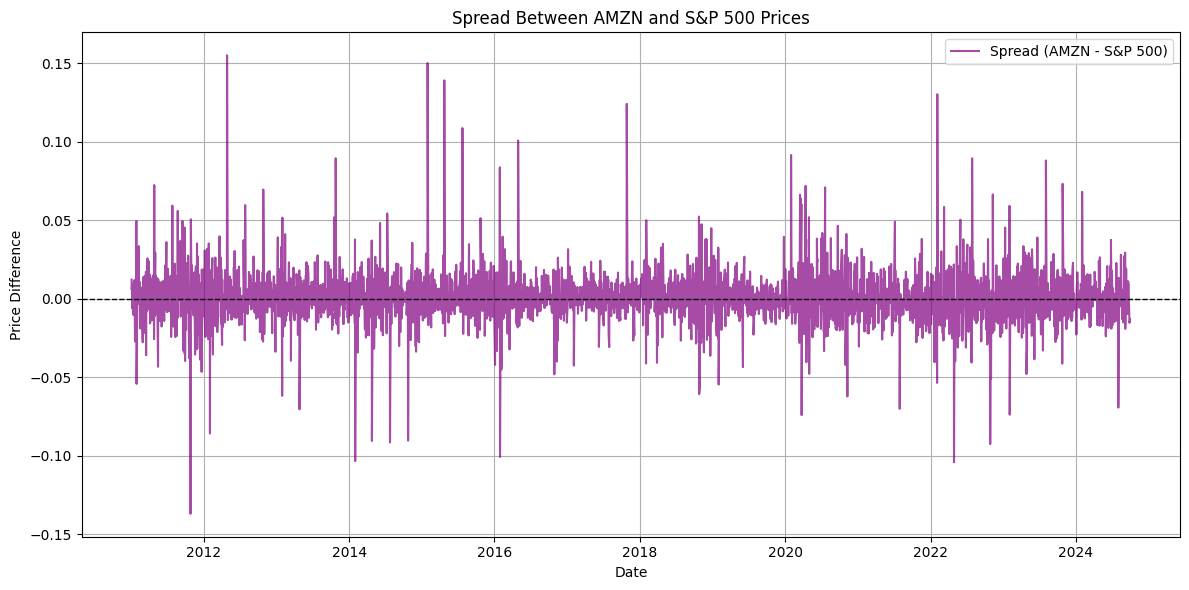

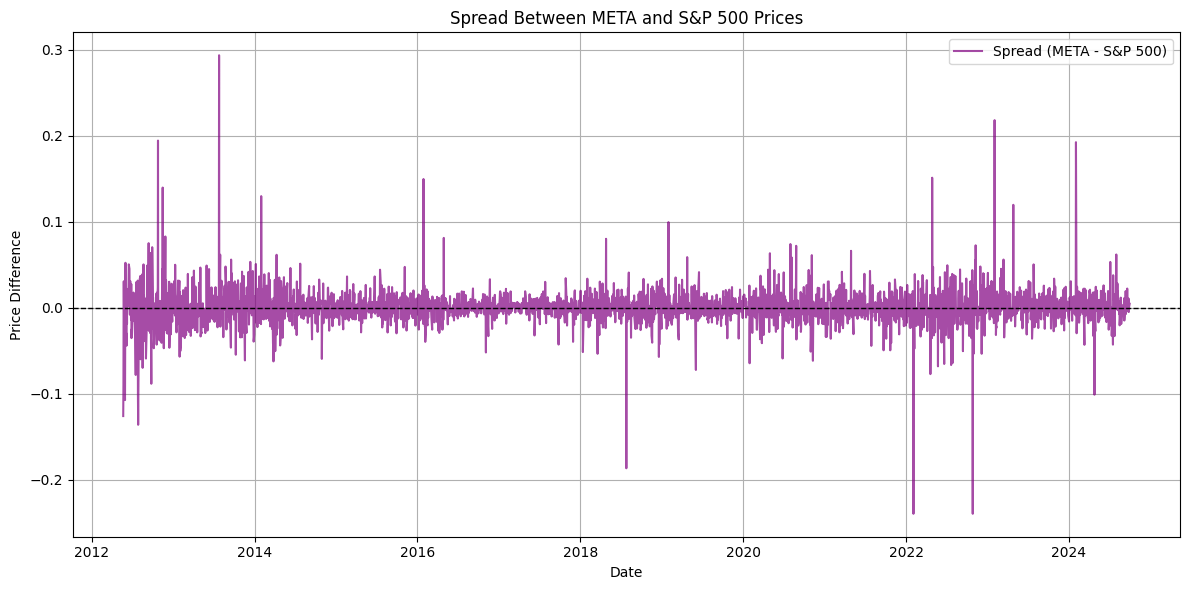

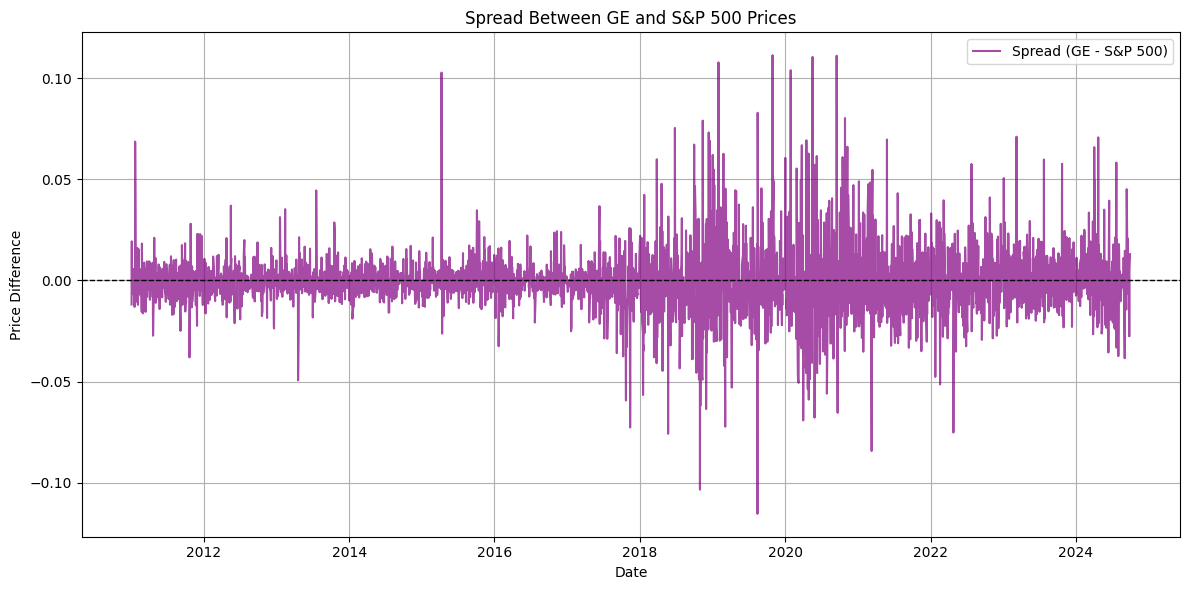

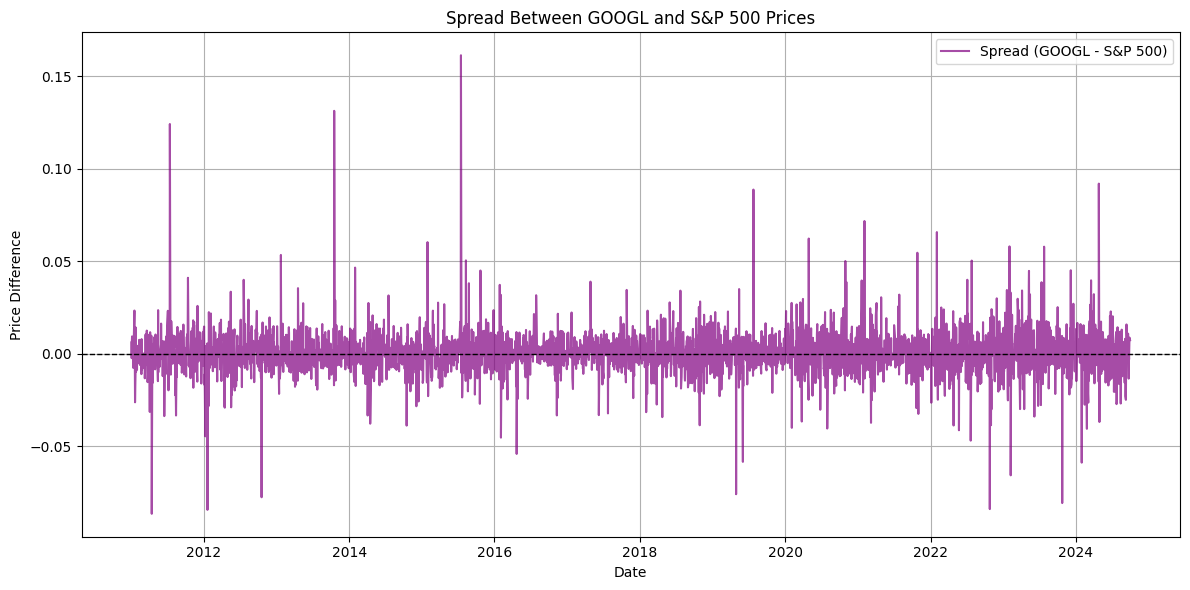

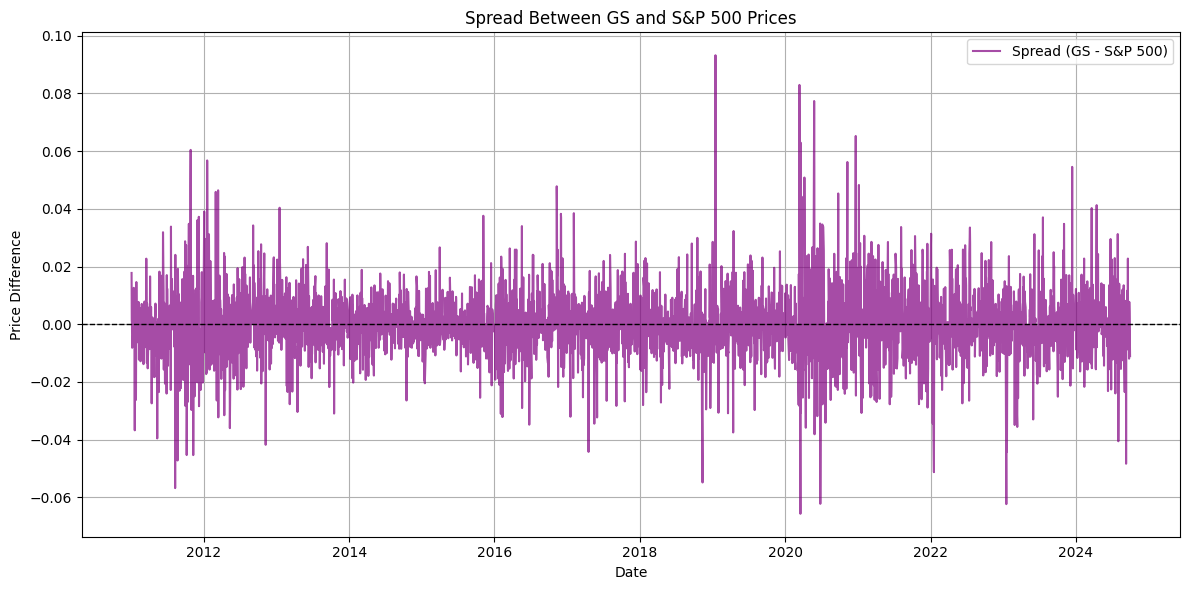

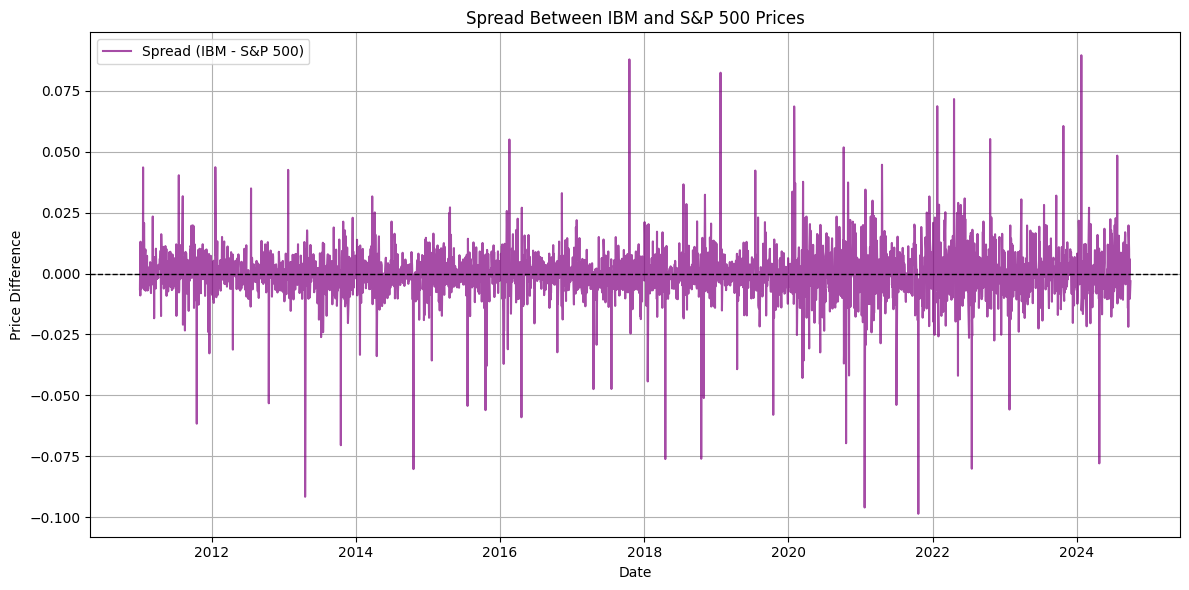

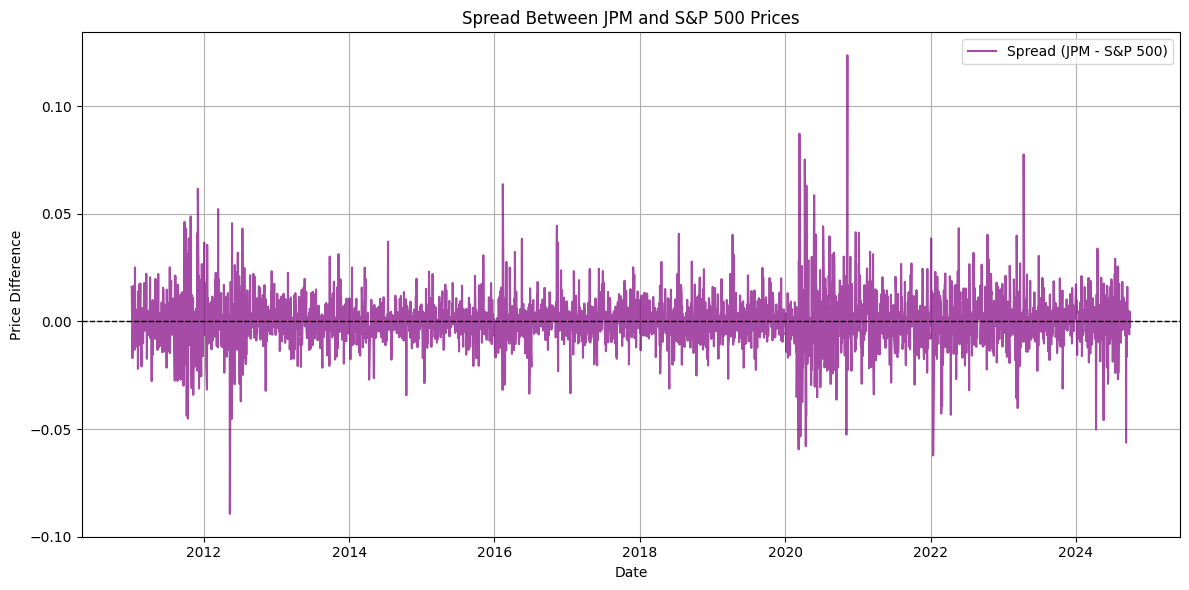

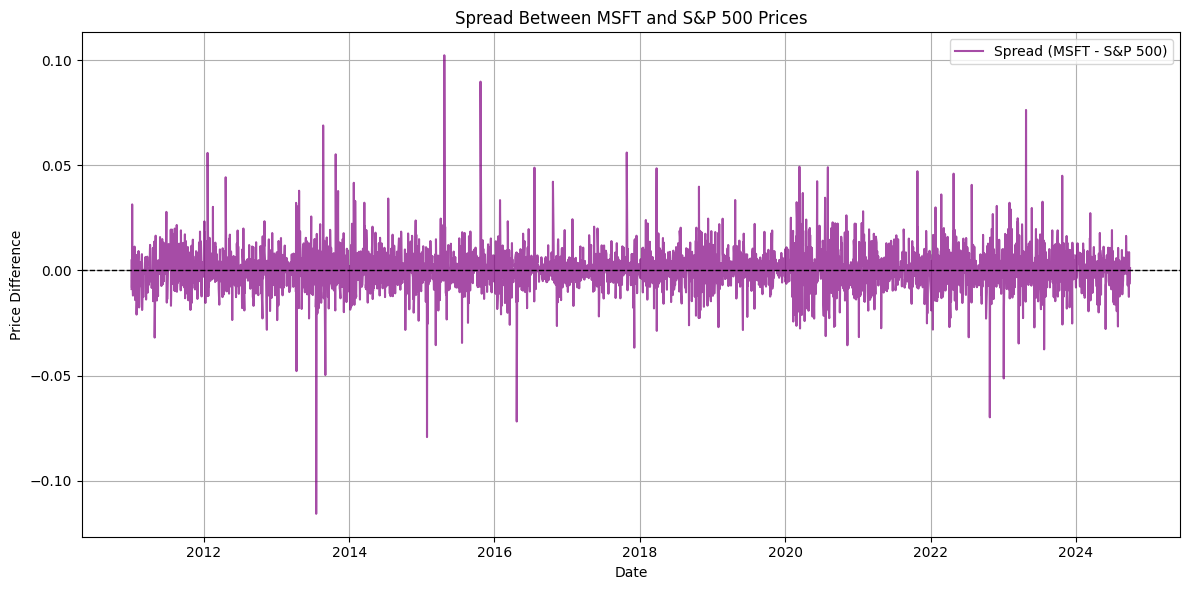

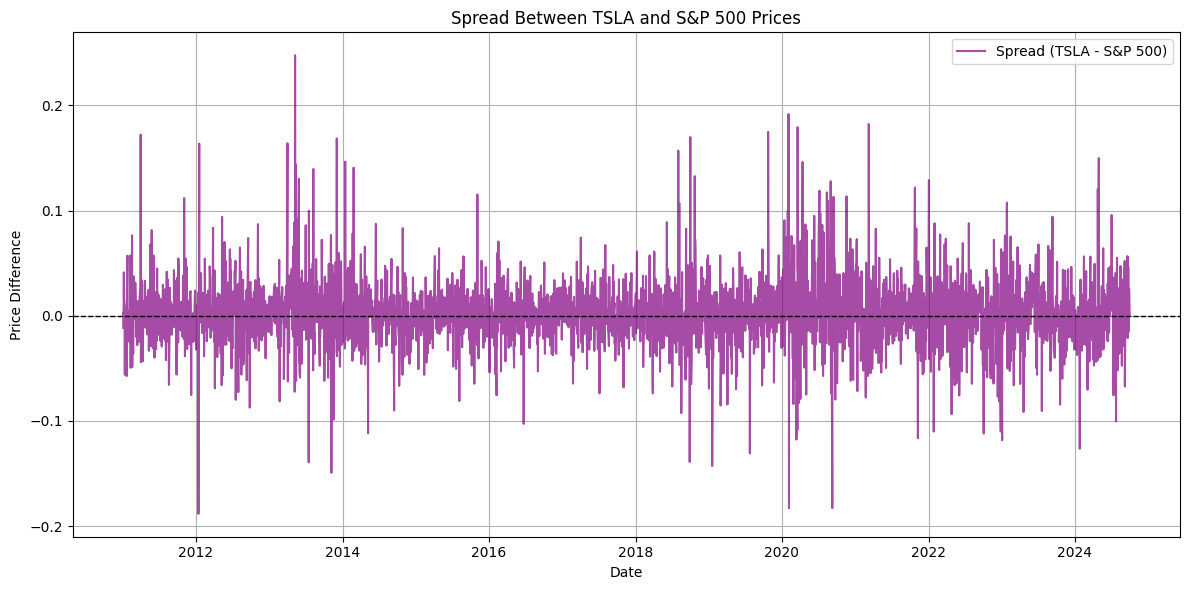

In [16]:
# Assuming merged_data, sp500, and tickers are defined
for ticker in tickers:
    # Filter data for the current ticker
    stock_data = merged_data[merged_data['Stock'] == ticker]
    stock_prices = stock_data['Stock_Returns']
    sp500_prices_subset = stock_data['SP500_Returns']

    # Calculate spread
    spread = stock_prices - sp500_prices_subset

    # Plot spread
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], spread, label=f'Spread ({ticker} - S&P 500)', color='purple', alpha=0.7)
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
    plt.title(f'Spread Between {ticker} and S&P 500 Prices')
    plt.xlabel('Date')
    plt.ylabel('Price Difference')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [68]:
# Cointegration with Error Correction Model (ECM)

from statsmodels.tsa.vector_ar.vecm import VECM
import pandas as pd
import numpy as np

# Store ECM results for each stock
ecm_results_dict = {}

# Initialize 'ECM_Signal' column in merged_data to 'hold' to avoid KeyError
merged_data['ECM_Signal'] = 'hold'

for stock in stocks:
    stock_data = merged_data[merged_data['Stock'] == stock].copy()
    cointegration_data = stock_data[['Adj Close', 'SP500_Returns']].dropna()

    # Fit the VECM model for cointegration analysis
    vecm = VECM(cointegration_data, k_ar_diff=1, coint_rank=1)
    ecm_results = vecm.fit()
    ecm_results_dict[stock] = ecm_results

    resid_df = pd.DataFrame({'ECM_Residuals': ecm_results.resid[:, 0]}, index=cointegration_data.index[:len(ecm_results.resid)])

    stock_data = pd.merge(stock_data, resid_df, left_index=True, right_index=True, how='left')

    # Calculate ECM_Signal within stock_data
    stock_data['ECM_Signal'] = np.where(stock_data['ECM_Residuals'] < -0.02, 'buy',
                                        np.where(stock_data['ECM_Residuals'] > 0.02, 'sell', 'hold'))

    # Update 'ECM_Signal' in merged_data using the index from stock_data
    merged_data.loc[stock_data.index, 'ECM_Signal'] = stock_data['ECM_Signal']


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot

In [69]:
merged_data['ECM_Signal']


,ECM_Signal
0,sell
1,sell
2,sell
3,sell
4,buy
...,...
34227,buy
34228,sell
34229,sell
34230,hold


In [72]:
# Markov Switching Models

from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

# Store Markov results for each stock
markov_results_dict = {}

for stock in stocks:
    # Fit a Markov Switching model with 2 regimes
    markov_model = MarkovRegression(merged_data['Stock_Returns'], k_regimes=2, trend='c', switching_variance=True)
    markov_results = markov_model.fit()
    markov_results_dict[stock] = markov_results

    # Add regime information to the dataset
    merged_data['Regime'] = np.where(markov_results.smoothed_marginal_probabilities[1] > 0.5,
                                    'High Volatility', 'Low Volatility')


In [77]:
merged_data['Regime']

,count
Regime,
Low Volatility,26173
High Volatility,8059


In [78]:
#Bayesian VAR (BVAR)

# Define the data including stock and S&P 500 returns
var_data = merged_data[['Stock_Returns', 'SP500_Returns']]

# Fit a VAR model (simplification of BVAR)
var_model = VAR(var_data)
bvar_results = var_model.fit(maxlags=2)

# Forecast using the fitted VAR model for the next 5 periods
forecast = bvar_results.forecast(var_data.values[-2:], steps=5)
forecast_df = pd.DataFrame(forecast, columns=['Forecasted_Stock_Returns', 'Forecasted_SP500_Returns'])
print("Forecasted stock returns:", forecast_df)

# Add forecast results back to the dataset for analysis
forecast_dates = pd.date_range(start=merged_data['Date'].iloc[-1] + pd.Timedelta(days=1), periods=5)
forecast_df['Date'] = forecast_dates


Forecasted stock returns:    Forecasted_Stock_Returns  Forecasted_SP500_Returns
0                  0.000162                 -0.000115
1                  0.001222                  0.000800
2                  0.000873                  0.000432
3                  0.000963                  0.000529
4                  0.000931                  0.000495


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                   Statespace Model Results                                   
Dep. Variable:     ['Stock_Returns', 'SP500_Returns']   No. Observations:                34232
Model:              DynamicFactor(factors=1, order=1)   Log Likelihood              197665.330
Date:                                Thu, 24 Oct 2024   AIC                        -395320.661
Time:                                        03:51:44   BIC                        -395278.456
Sample:                                             0   HQIC                       -395307.204
                                              - 34232                                         
Covariance Type:                                  opg                                         
Ljung-Box (L1) (Q):            0.01, 21.26   Jarque-Bera (JB):   222433.63, 124108.35
Prob(Q):                        0.93, 0.00   Prob(JB):                     0.00, 0.00
Heteroskedasticity (H):         1.36, 1.16   Skew:                  

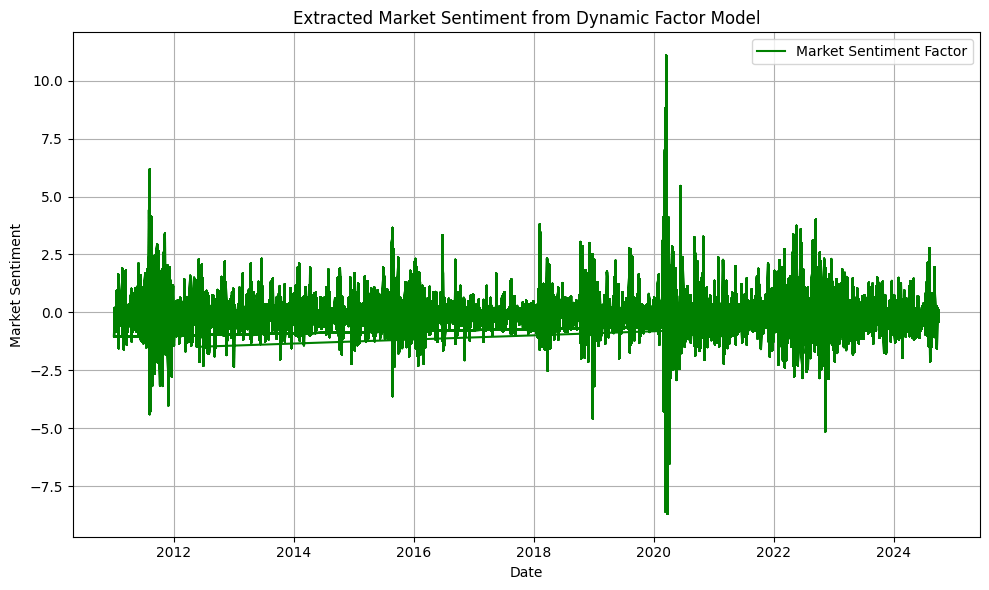

In [79]:
# Dynamic Factor Models (DFM)

from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor

# Fit a Dynamic Factor Model with stock returns as endogenous variables
dfm_model = DynamicFactor(merged_data[['Stock_Returns', 'SP500_Returns']], k_factors=1, factor_order=1)
dfm_results = dfm_model.fit()
print(dfm_results.summary())

# Extract the common factor and add it to the dataset as a proxy for market sentiment
merged_data['Market_Sentiment'] = dfm_results.factors.filtered[0]

# Plot the extracted market sentiment factor over time
plt.figure(figsize=(10, 6))
plt.plot(merged_data['Date'], merged_data['Market_Sentiment'], label='Market Sentiment Factor', color='green')
plt.title('Extracted Market Sentiment from Dynamic Factor Model')
plt.xlabel('Date')
plt.ylabel('Market Sentiment')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [80]:
# Value-at-Risk (VaR) for Risk Management

# Store VaR results for each stock
var_results_dict = {}
confidence_level = 0.95

for stock in stocks:
    # Calculate VaR using historical method
    historical_var = np.percentile(merged_data['Stock_Returns'], (1 - confidence_level) * 100)
    merged_data['VaR'] = abs(historical_var)
    var_results_dict[stock] = historical_var


In [88]:
#Refitting ARIMA-Garch
garch_volatility = {}

for ticker in merged_data['Stock'].unique():
    stock_data = merged_data[merged_data['Stock'] == ticker][['Stock_Returns', 'SP500_Returns']].dropna()

    # Fit ARIMA model to the stock returns, including SP500_Returns as exogenous variable
    arima_model = ARIMA(stock_data['Stock_Returns'], exog=stock_data['SP500_Returns'], order=(1, 0, 1))
    arima_fit = arima_model.fit()

    # Fit GARCH model to ARIMA residuals
    garch_model = arch_model(arima_fit.resid, vol='Garch', p=1, q=1)
    garch_fit = garch_model.fit(disp="off")

    # Store conditional volatility
    garch_volatility[ticker] = garch_fit.conditional_volatility

# Add GARCH Volatility to merged_data
for ticker in merged_data['Stock'].unique():
        # Filter data for the current ticker
        stock_data = merged_data[merged_data['Stock'] == ticker]

        # Reindex conditional volatility to match stock_data's index
        volatility_series = garch_volatility[ticker].reindex(stock_data.index)

        # Assign volatility to the 'GARCH_Volatility' column
        merged_data.loc[stock_data.index, 'GARCH_Volatility'] = volatility_series.values



/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001661. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._ini

In [91]:
merged_data['GARCH_Volatility']

,GARCH_Volatility
0,0.011003
1,0.010977
2,0.010774
3,0.010476
4,0.010221
...,...
34227,0.030123
34228,0.029550
34229,0.028986
34230,0.028580


In [95]:
def trading_strategy_with_capm(data, capm_df, ecm_signals, garch_vol_dict, var_results_dict):
    """
    A trading strategy that uses CAPM alpha and beta, ECM signals, and GARCH volatility.
    """
    positions = []
    position_sizes = []

    for index, row in data.iterrows():
        stock = row['Stock']
        date = row['Date']
        alpha = capm_df.loc[capm_df['Stock'] == stock, 'Alpha'].values[0]
        beta = capm_df.loc[capm_df['Stock'] == stock, 'Beta'].values[0]
        ecm_signal = ecm_signals.get(date, 'hold')
        garch_volatility = garch_vol_dict.get(stock, pd.Series()).get(date, 0.02)  # Default to 0.02 if not found
        market_var = var_results_dict.get(stock, 0.02)  # Default to 0.02 if not found

        # Determine the position based on CAPM alpha and ECM signals
        if ecm_signal == 'buy' and alpha > 0:
            position = 1  # Buy if ECM indicates a buy and alpha is positive
        elif ecm_signal == 'sell' or alpha < 0:
            position = -1  # Sell if ECM indicates a sell or alpha is negative
        else:
            position = 0  # Hold if no clear signal

        # Adjust position size based on beta and GARCH volatility
        if beta > 0:
            position_size = 1000 / (1 + garch_volatility) * alpha * (1 - market_var)
        else:
            position_size = 500 / (1 + garch_volatility)

        positions.append(position)
        position_sizes.append(position_size)

    data['Position'] = positions
    data['Position_Size'] = position_sizes
    return data

# Apply the strategy to each stock
for ticker in tickers:
    stock_data = merged_data[merged_data['Stock'] == ticker].copy()

    # Apply the strategy with CAPM, ECM signals, and GARCH volatility
    stock_data = trading_strategy_with_capm(
        merged_data,
    capm_results,
    merged_data['GARCH_Volatility'],
    merged_data['Market_Sentiment'],
    merged_data['ECM_Signal'])

    # Store the results back into the merged_data
    merged_data.loc[stock_data.index, ['Position', 'Position_Size']] = stock_data[['Position', 'Position_Size']]


In [96]:
merged_data[['Position','Position_Size']]

,Position,Position_Size
0,0,0.498455
1,0,0.498455
2,0,0.498455
3,0,0.498455
4,0,0.498455
...,...,...
34227,0,1.295268
34228,0,1.295268
34229,0,1.295268
34230,0,1.295268


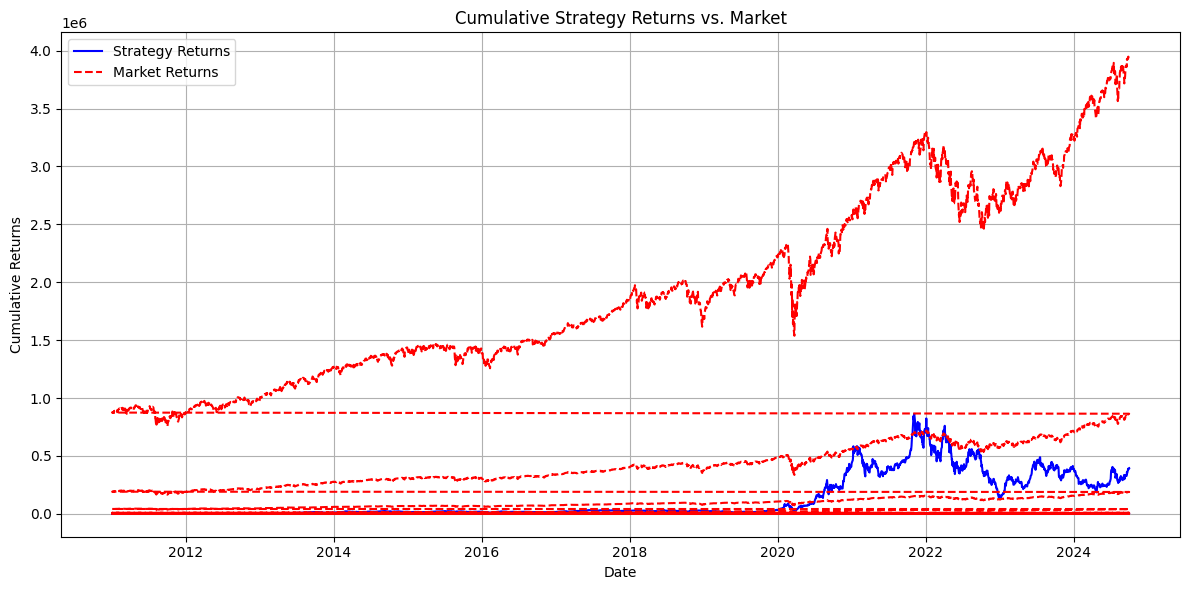

Strategy Sharpe Ratio: 0.5004722772294854
Strategy Maximum Drawdown: 724902.5661275974


In [99]:
# Backtesting and evaluate

# Calculate daily strategy returns
merged_data['Strategy_Returns'] = merged_data['Stock_Returns'] * merged_data['Position_Size'].shift(1)

# Compute cumulative returns
merged_data['Cumulative_Strategy_Returns'] = (1 + merged_data['Strategy_Returns']).cumprod()
merged_data['Cumulative_Market_Returns'] = (1 + merged_data['SP500_Returns']).cumprod()

# Plot cumulative returns of the strategy vs. the market
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], merged_data['Cumulative_Strategy_Returns'], label='Strategy Returns', color='blue')
plt.plot(merged_data['Date'], merged_data['Cumulative_Market_Returns'], label='Market Returns', color='red', linestyle='--')
plt.title('Cumulative Strategy Returns vs. Market')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate performance metrics
strategy_sharpe_ratio = (merged_data['Strategy_Returns'].mean() / merged_data['Strategy_Returns'].std()) * np.sqrt(252)  # Annualized Sharpe Ratio
strategy_max_drawdown = (merged_data['Cumulative_Strategy_Returns'].cummax() - merged_data['Cumulative_Strategy_Returns']).max()

print(f"Strategy Sharpe Ratio: {strategy_sharpe_ratio}")
print(f"Strategy Maximum Drawdown: {strategy_max_drawdown}")
